In [ ]:
!pip install --upgrade gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1T5skWZOv4nUU-U2UyQA2jdIbnEhmULs2/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1T5skWZOv4nUU-U2UyQA2jdIbnEhmULs2
From (redirected): https://drive.google.com/uc?id=1T5skWZOv4nUU-U2UyQA2jdIbnEhmULs2&confirm=t&uuid=13149f29-d077-4859-b63f-3fbd6c22bc69
To: /content/archive.zip
100% 69.2M/69.2M [00:00<00:00, 77.9MB/s]


In [ ]:
!unzip /content/archive.zip -d /content/

Archive:  /content/archive.zip
  inflating: /content/creditcard.csv  


In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
#read the dataset
dataset = pd.read_csv("creditcard.csv")
# read the first 5 and last 5 rows of the data
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<Axes: ylabel='count'>

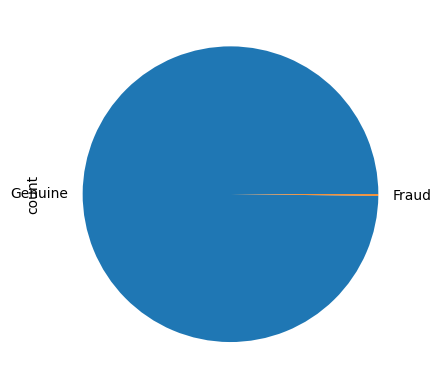

In [ ]:
# check for relative proportion
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

# To see how small are the number of Fraud transactions
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

/tmp/ipython-input-13-1884678877.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipython-input-13-1884678877.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

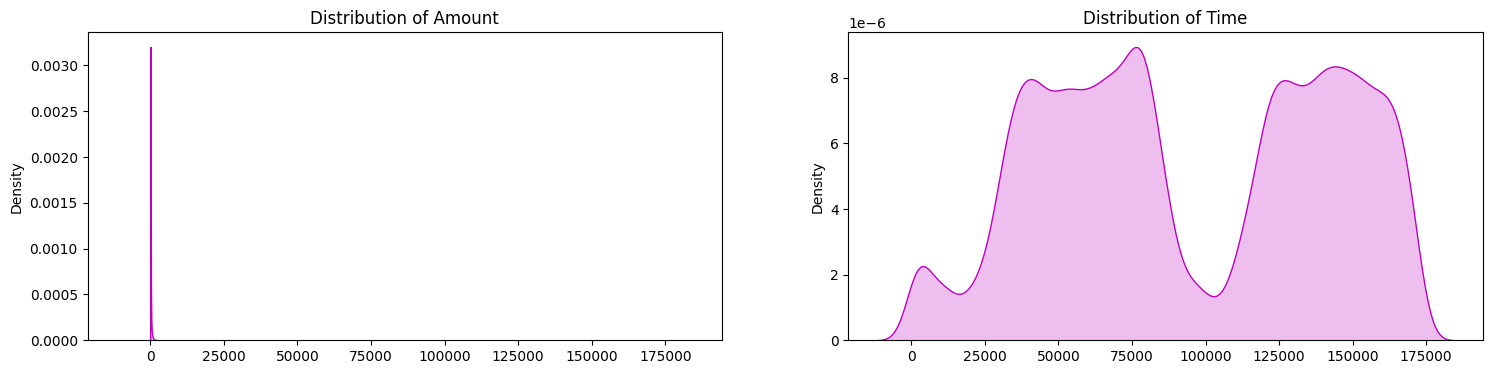

In [ ]:
# plot the named features
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_value = dataset['Amount'].values # values
time_value = dataset['Time'].values # values

sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')

plt.show()

In [ ]:
print("Average Amount in a Fraudulent Transaction: " + str(dataset[dataset["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(dataset[dataset["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


In [ ]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


/tmp/ipython-input-16-2736235017.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipython-input-16-2736235017.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

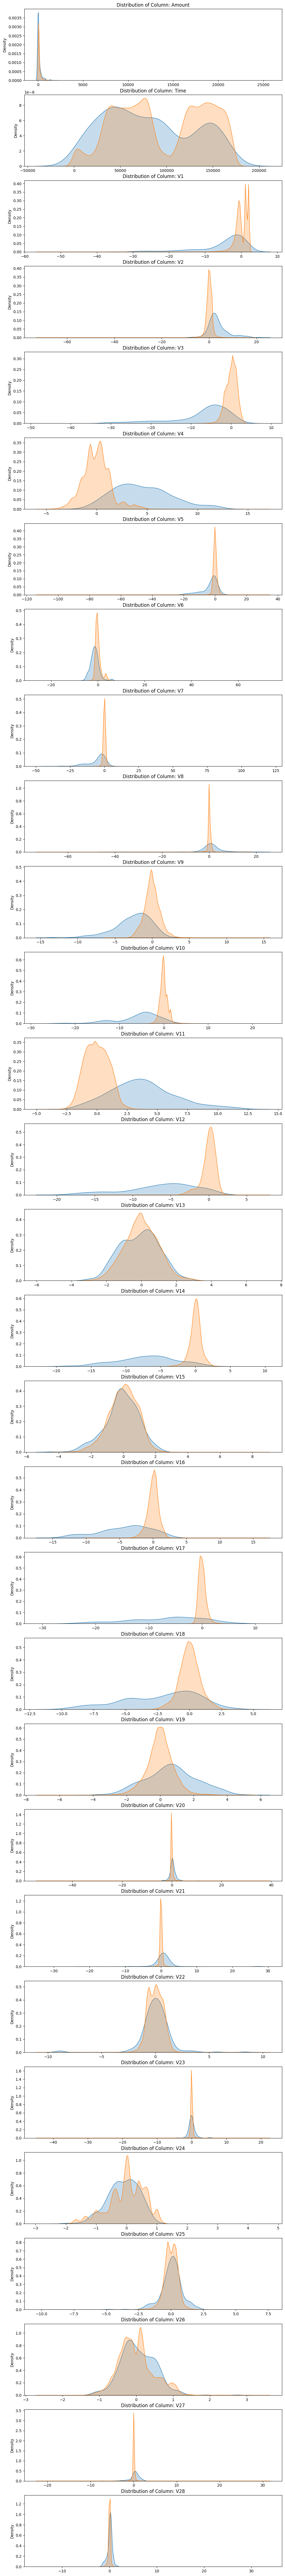

In [ ]:
# # Reorder the columns Amount, Time then the rest
# data_plot = dataset.copy()
# amount = data_plot['Amount']
# data_plot.drop(labels=['Amount'], axis=1, inplace = True)
# data_plot.insert(0, 'Amount', amount)

# # Plot the distributions of the features
# columns = data_plot.iloc[:,0:30].columns
# plt.figure(figsize=(12,30*4))
# grids = gridspec.GridSpec(30, 1)
# for grid, index in enumerate(data_plot[columns]):
#  ax = plt.subplot(grids[grid])
#  sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
#  sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
#  ax.set_xlabel("")
#  ax.set_title("Distribution of Column: "  + str(index))
# plt.show()

In [ ]:
# check for null values
dataset.isnull().shape[0]
print("Non-missing values: " + str(dataset.isnull().shape[0]))
print("Missing values: " + str(dataset.shape[0] - dataset.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [ ]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = dataset["Class"] # target
X = dataset.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [ ]:
# Create the cross validation framework
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [ ]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods.
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE.
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Using SKLEARN module for random forest
from sklearn.ensemble import RandomForestClassifier

# Fit and predict
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9995786664794073
The precision is 0.9625
The recall is 0.7857142857142857
The F1 score is 0.8651685393258427


In [ ]:
import joblib
import pickle
import os
from datetime import datetime
def _save_best_model(best_estimator, estimator_name, model_save_path, save_format, f1_score, accuracy):
    """
    Helper function to save the best model to disk.

    Returns:
    --------
    str: Path where the model was saved
    """
    # Create models directory if it doesn't exist
    models_dir = "saved_models"
    os.makedirs(models_dir, exist_ok=True)

    # Generate filename if not provided
    if model_save_path is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{estimator_name}_{timestamp}_f1_{f1_score:.3f}_acc_{accuracy:.3f}"

        if save_format == 'joblib':
            filename += ".joblib"
        else:
            filename += ".pkl"

        model_save_path = os.path.join(models_dir, filename)

    # Save the model
    try:
        if save_format == 'joblib':
            joblib.dump(best_estimator, model_save_path, compress=3)
        else:  # pickle
            with open(model_save_path, 'wb') as f:
                pickle.dump(best_estimator, f)

        print(f"Model saved successfully at: {model_save_path}")
        return model_save_path

    except Exception as e:
        print(f"Error saving model: {str(e)}")
        return None


_save_best_model(best_estimator=rfc, estimator_name="random_forest", model_save_path=None, save_format="joblib", f1_score=f1_score(y_test, y_pred), accuracy=accuracy_score(y_test, y_pred))
_save_best_model(best_estimator=rfc, estimator_name="random_forest", model_save_path=None, save_format="pkl", f1_score=f1_score(y_test, y_pred), accuracy=accuracy_score(y_test, y_pred))


Model saved successfully at: saved_models/random_forest_20250721_061827_f1_0.865_acc_1.000.joblib
Model saved successfully at: saved_models/random_forest_20250721_061827_f1_0.865_acc_1.000.pkl


'saved_models/random_forest_20250721_061827_f1_0.865_acc_1.000.pkl'

In [ ]:


def load_saved_model(model_path, format_type='auto'):
    """
    Load a previously saved model.

    Parameters:
    -----------
    model_path : str
        Path to the saved model file
    format_type : str, default='auto'
        Format of the saved model ('joblib', 'pickle', or 'auto' to detect)

    Returns:
    --------
    Loaded model pipeline
    """
    try:
        if format_type == 'auto':
            # Auto-detect format based on file extension
            if model_path.endswith('.joblib'):
                return joblib.load(model_path)
            elif model_path.endswith('.pkl'):
                with open(model_path, 'rb') as f:
                    return pickle.load(f)
            else:
                # Try joblib first, then pickle
                try:
                    return joblib.load(model_path)
                except:
                    with open(model_path, 'rb') as f:
                        return pickle.load(f)
        elif format_type == 'joblib':
            return joblib.load(model_path)
        else:  # pickle
            with open(model_path, 'rb') as f:
                return pickle.load(f)

    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return None


def make_predictions_with_saved_model(model_path, X_new, return_proba=False):
    """
    Make predictions using a saved model.

    Parameters:
    -----------
    model_path : str
        Path to the saved model file
    X_new : array-like
        New data to make predictions on
    return_proba : bool, default=False
        Whether to return prediction probabilities

    Returns:
    --------
    array: Predictions (and probabilities if requested)
    """
    # Load the model
    model = load_saved_model(model_path)

    if model is None:
        return None

    try:
        # Make predictions
        predictions = model.predict(X_new)

        if return_proba:
            try:
                probabilities = model.predict_proba(X_new)
                return predictions, probabilities
            except AttributeError:
                print("Model doesn't support probability predictions")
                return predictions

        return predictions

    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None



model_path = "saved_models/random_forest_20250721_061525_f1_0.865_acc_1.000.joblib"
make_predictions_with_saved_model(model_path, X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:


def get_model_best_estimator_and_metrics(estimator, params, kf=kf, X_train=X_train,
                                         y_train=y_train, X_test=X_test,
                                         y_test=y_test, is_grid_search=True,
                                         sampling=NearMiss(), scoring="f1",
                                         n_jobs=2, save_model=True,
                                         model_save_path=None, save_format='joblib'):
    """
    Train and evaluate a model with hyperparameter tuning, optionally save the best model.

    Parameters:
    -----------
    save_model : bool, default=True
        Whether to save the best model to disk
    model_save_path : str, optional
        Custom path to save the model. If None, auto-generates path
    save_format : str, default='joblib'
        Format to save model ('joblib' or 'pickle')
    """

    if sampling is None:
        # make the pipeline of only the estimator, just so the remaining code will work fine
        pipeline = make_pipeline(estimator)
    else:
        # make the pipeline of over/undersampling and estimator
        pipeline = make_pipeline(sampling, estimator)

    # get the estimator name
    estimator_name = estimator.__class__.__name__.lower()

    # construct the parameters for grid/random search cv
    new_params = {f'{estimator_name}__{key}': params[key] for key in params}

    if is_grid_search:
        # grid search instead of randomized search
        search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, scoring=scoring,
                             return_train_score=True, n_jobs=n_jobs, verbose=2)
    else:
        # randomized search
        search = RandomizedSearchCV(pipeline, param_distributions=new_params,
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=1)

    # fit the model
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)

    # make predictions on the test data
    y_pred = search.best_estimator_.named_steps[estimator_name].predict(X_test)

    # calculate the metrics: recall, accuracy, F1 score, etc.
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.named_steps[estimator_name].predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Save the best model if requested
    model_path = None
    if save_model:
        model_path = _save_best_model(search.best_estimator_, estimator_name,
                                     model_save_path, save_format, f1, accuracy)

    # return the best estimator along with the metrics
    return {
        "best_estimator": search.best_estimator_,
        "estimator_name": estimator_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
        "model_path": model_path,
        "best_params": search.best_params_
    }


def _save_best_model(best_estimator, estimator_name, model_save_path, save_format, f1_score, accuracy):
    """
    Helper function to save the best model to disk.

    Returns:
    --------
    str: Path where the model was saved
    """
    # Create models directory if it doesn't exist
    models_dir = "saved_models"
    os.makedirs(models_dir, exist_ok=True)

    # Generate filename if not provided
    if model_save_path is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{estimator_name}_{timestamp}_f1_{f1_score:.3f}_acc_{accuracy:.3f}"

        if save_format == 'joblib':
            filename += ".joblib"
        else:
            filename += ".pkl"

        model_save_path = os.path.join(models_dir, filename)

    # Save the model
    try:
        if save_format == 'joblib':
            joblib.dump(best_estimator, model_save_path, compress=3)
        else:  # pickle
            with open(model_save_path, 'wb') as f:
                pickle.dump(best_estimator, f)

        print(f"Model saved successfully at: {model_save_path}")
        return model_save_path

    except Exception as e:
        print(f"Error saving model: {str(e)}")
        return None


def load_saved_model(model_path, format_type='auto'):
    """
    Load a previously saved model.

    Parameters:
    -----------
    model_path : str
        Path to the saved model file
    format_type : str, default='auto'
        Format of the saved model ('joblib', 'pickle', or 'auto' to detect)

    Returns:
    --------
    Loaded model pipeline
    """
    try:
        if format_type == 'auto':
            # Auto-detect format based on file extension
            if model_path.endswith('.joblib'):
                return joblib.load(model_path)
            elif model_path.endswith('.pkl'):
                with open(model_path, 'rb') as f:
                    return pickle.load(f)
            else:
                # Try joblib first, then pickle
                try:
                    return joblib.load(model_path)
                except:
                    with open(model_path, 'rb') as f:
                        return pickle.load(f)
        elif format_type == 'joblib':
            return joblib.load(model_path)
        else:  # pickle
            with open(model_path, 'rb') as f:
                return pickle.load(f)

    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return None


def make_predictions_with_saved_model(model_path, X_new, return_proba=False):
    """
    Make predictions using a saved model.

    Parameters:
    -----------
    model_path : str
        Path to the saved model file
    X_new : array-like
        New data to make predictions on
    return_proba : bool, default=False
        Whether to return prediction probabilities

    Returns:
    --------
    array: Predictions (and probabilities if requested)
    """
    # Load the model
    model = load_saved_model(model_path)

    if model is None:
        return None

    try:
        # Make predictions
        predictions = model.predict(X_new)

        if return_proba:
            try:
                probabilities = model.predict_proba(X_new)
                return predictions, probabilities
            except AttributeError:
                print("Model doesn't support probability predictions")
                return predictions

        return predictions

    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None



In [ ]:
# Cumulatively create a table for the ROC curve
## Create the dataframe
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

rfc_results = get_model_best_estimator_and_metrics(
    estimator=RandomForestClassifier(),
    params={
      'n_estimators': [50, 100, 200],
      'max_depth': [4, 6, 10, 12],
      'random_state': [13]
    },
    sampling=None,
    n_jobs=3,
)
res_table = res_table.append({'classifiers': rfc_results["estimator_name"],
                                        'fpr': rfc_results["fpr"],
                                        'tpr': rfc_results["tpr"],
                                        'auc': rfc_results["auc"]
                              }, ignore_index=True)


In [ ]:
print(f"==={rfc_results['estimator_name']}===")
print("Model:", rfc_results['best_estimator'])
print("Accuracy:", rfc_results['accuracy'])
print("Recall:", rfc_results['recall'])
print("F1 Score:", rfc_results['f1_score'])

In [ ]:
logreg_us_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'],
                  'C': [ 0.01, 0.1, 1, 100],
                  'solver' : ['liblinear']},
    sampling=NearMiss(),
    n_jobs=3,
)
print(f"==={logreg_us_results['estimator_name']}===")
print("Model:", logreg_us_results['best_estimator'])
print("Accuracy:", logreg_us_results['accuracy'])
print("Recall:", logreg_us_results['recall'])
print("F1 Score:", logreg_us_results['f1_score'])
res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],
                                        'fpr': logreg_us_results["fpr"],
                                        'tpr': logreg_us_results["tpr"],
                                        'auc': logreg_us_results["auc"]
                              }, ignore_index=True)
res_table

In [ ]:
# Plot the ROC curve for undersampling
res_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'],
             res_table.loc[j]['tpr'],
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [ ]:
# Cumulatively create a table for the ROC curve
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

lin_reg_os_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100],
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    scoring="f1",
    is_grid_search=False,
    n_jobs=2,
)
print(f"==={lin_reg_os_results['estimator_name']}===")
print("Model:", lin_reg_os_results['best_estimator'])
print("Accuracy:", lin_reg_os_results['accuracy'])
print("Recall:", lin_reg_os_results['recall'])
print("F1 Score:", lin_reg_os_results['f1_score'])
res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],
                                        'fpr': lin_reg_os_results["fpr"],
                                        'tpr': lin_reg_os_results["tpr"],
                                        'auc': lin_reg_os_results["auc"]
                              }, ignore_index=True)

In [ ]:
# boxplot for two example variables in the dataset

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = dataset["V1"]
variable2 = dataset["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

In [ ]:
# Find the IQR for all the feature variables
# Please note that we are keeping Class variable also in this evaluation, though we know using this method no observation
# be removed based on this variable.

quartile1 = dataset.quantile(0.25)
quartile3 = dataset.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

In [ ]:
# Remove the outliers
constant = 3
datavalid = dataset[~((dataset < (quartile1 - constant * IQR)) |(dataset > (quartile3 + constant * IQR))).any(axis=1)]
deletedrows = dataset.shape[0] - datavalid.shape[0]
print("We have removed " + str(deletedrows) + " rows from the data as outliers")